In [4]:
using StatsPlots
using LinearAlgebra
using Random
using Statistics
using Distributions
using Plots
using LaTeXStrings

In [117]:
# Parámetros del sistema
p1_1 = 2.0
p1_2 = 0.5
p2_1 = 0.9
p2_2 = 0.2

c_p_1_1 = 1.2
c_p_1_2 = 0.8
c_p_2_1 = 0.3
c_p_2_2 = 0.4

# Funciones de las ecuaciones diferenciales
function dN_P1_dt(N_P1, N_P2)
    return p1_1 * N_P1 - p1_2 * N_P1^2
end

function dN_P2_dt(N_P1, N_P2)
    return p1_2 * N_P1^2 + p2_1 * N_P2 - p2_2 * N_P2^2
end

function dC_P1_dt(N_P1, C_P1)
    return c_p_1_1 * N_P1 * C_P1 - c_p_1_2 * N_P1 * C_P1^2
end

function dC_P2_dt(N_P1, N_P2, C_P1, C_P2)
    return c_p_1_2 * N_P1 * C_P1^2 + c_p_2_1 * N_P2 * C_P2 - c_p_2_2 * N_P2 * C_P2^2
end

# Método de Euler para resolver el sistema
function euler_method(f1, f2, f3, f4, N_P1_0=1.15, N_P2_0=0.55, C_P1_0=0.15, C_P2_0=0.25, t_end=3.0, dt=0.02)
    # Inicialización de las variables
    t = 0.0
    N_P1 = N_P1_0
    N_P2 = N_P2_0
    C_P1 = C_P1_0
    C_P2 = C_P2_0

    # Almacenar los resultados
    results = [(t, N_P1, N_P2, C_P1, C_P2)]

    # Iteración para aplicar el método de Euler
    while t < t_end
        # Actualización con el método de Euler
        N_P1_new = N_P1 + f1(N_P1, N_P2) * dt
        N_P2_new = N_P2 + f2(N_P1, N_P2) * dt
        C_P1_new = C_P1 + f3(N_P1, C_P1) * dt
        C_P2_new = C_P2 + f4(N_P1, N_P2, C_P1, C_P2) * dt

        # Avance en el tiempo
        t += dt

        # Guardar los resultados
        push!(results, (t, N_P1_new, N_P2_new, C_P1_new, C_P2_new))

        # Actualizar las variables
        N_P1, N_P2, C_P1, C_P2 = N_P1_new, N_P2_new, C_P1_new, C_P2_new
    end

    return results
end




# Resolver el sistema
results = euler_method(dN_P1_dt, dN_P2_dt, dC_P1_dt, dC_P2_dt)


151-element Vector{NTuple{5, Float64}}:
 (0.0, 1.15, 0.55, 0.15, 0.25)
 (0.02, 1.182775, 0.5719150000000001, 0.153726, 0.250964)
 (0.04, 1.2160964329937498, 0.5948906899373501, 0.15764254304839653, 0.2519842288234969)
 (0.06, 1.2499513849700985, 0.6189720479677271, 0.16176000513742686, 0.253065004308395)
 (0.08, 1.2843256557210159, 0.6442048238943714, 0.16608931092429552, 0.25421102977415255)
 (0.1, 1.3192037580504243, 0.6706354352033872, 0.17064195372264532, 0.2554274322586548)
 (0.12000000000000001, 1.3545689228198976, 0.69831085104179, 0.1754300144050588, 0.25671980478802553)
 (0.14, 1.390403110065999, 0.727278463848506, 0.18046617880944543, 0.25809425309316286)
 (0.16, 1.426687026383827, 0.7575859484266798, 0.18576375317676316, 0.25955744721985)
 (0.18, 1.4634001487266608, 0.7892811083338651, 0.19133667707525867, 0.26111667851204656)
 (0.19999999999999998, 1.500520754722795, 0.8224117095649158, 0.19719953318718253, 0.2627799224793699)
 (0.21999999999999997, 1.5380259595581682, 0.85

In [118]:
Data = zeros(11,5)
for k in 1:11
    Data[k,:] .= results[1:15:end][k]
end
Data[2:11,2:5] = Data[2:11,2:5] .* rand(Gamma(50,1/50),(10,4))
Data

11×5 Matrix{Float64}:
 0.0  1.15     0.55     0.15      0.25
 0.3  1.74161  1.02788  0.229884  0.275086
 0.6  2.54693  2.19461  0.477985  0.341614
 0.9  2.96903  3.66795  0.976376  0.508996
 1.2  2.98401  5.50795  0.880152  1.18602
 1.5  4.0826   7.64779  1.13794   1.89653
 1.8  3.53511  7.25067  1.46948   1.46106
 2.1  4.42068  8.56117  1.78179   1.78513
 2.4  3.49471  8.26475  1.77665   1.55102
 2.7  5.08546  8.22512  1.25616   2.02851
 3.0  3.02548  8.56805  1.52508   2.28784

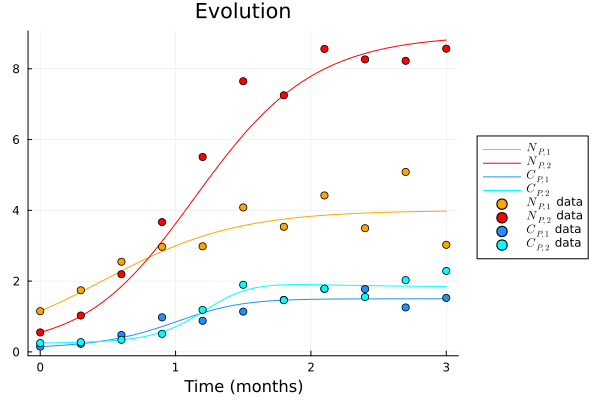

In [122]:
# Extraer los resultados para graficar
times = [t for (t, _, _, _, _) in results]
N_P1_vals = [N_P1 for (_, N_P1, _, _, _) in results]
N_P2_vals = [N_P2 for (_, _, N_P2, _, _) in results]
C_P1_vals = [C_P1 for (_, _, _, C_P1, _) in results]
C_P2_vals = [C_P2 for (_, _, _, _, C_P2) in results]

# Graficar los resultados
plot(times, N_P1_vals, label=L"$N_{P,1}$", xlabel="Time (months)", ylabel="", title="Evolution",color=:orange,legend=:outerright)
plot!(times, N_P2_vals, label=L"$N_{P,2}$",color=:red)
plot!(times, C_P1_vals, label=L"$C_{P,1}$",color=:dodgerblue)
plot!(times, C_P2_vals, label=L"$C_{P,2}$",color=:cyan)
scatter!(Data[:,1], Data[:,2], label=L"$N_{P,1}$ data",color=:orange)
scatter!(Data[:,1], Data[:,3], label=L"$N_{P,2}$ data",color=:red)
scatter!(Data[:,1], Data[:,4], label=L"$C_{P,1}$ data",color=:dodgerblue)
scatter!(Data[:,1], Data[:,5], label=L"$C_{P,2}$ data",color=:cyan)

#savefig("5_TOMGRO_SimulatedDataGraph")